# Wstęp


## Omówienie problemu


Problemem, nad którym skupię się w mojej pracy jest "problem sumy elementów podzbioru" (ang. ["subset sum problem"](https://en.wikipedia.org/wiki/Subset_sum_problem)).
Jest to problem decyzyjny, który w ogólnym założeniu polega na znalezieniu odpowiedzi na pytanie, czy dla danego zbioru liczb całkowitych $S$ istnieje podzbiór, którego wszystkie elementy sumują się dokładnie do danej liczby $T$.

W tej formie problem ten jest [NP-trudny](https://pl.wikipedia.org/wiki/Problem_NP-trudny), jednak ja skupię się na jednym z jego wariantów, który jest [NP-zupełny](https://pl.wikipedia.org/wiki/Problem_NP-zupe%C5%82ny).
Zbiór $S$, z którym będziemy pracować, będzie składał się z dodatnich i ujemnych liczb całkowitych, a szukana suma podzbioru będzie wynosiła $T=0$.

W mojej pracy postaram się znaleźć odpowiedź na zadane pytanie z wykorzystaniem dwóch rodzajów algorytmów bioinspirowanych: algorytmu genetycznego oraz inteligencji roju.


## Dane wejściowe


W celu próby rozwiązania problemu z wykorzystaniem algorytmów bioinspirowanych, przygotowałem zestaw z góry ustalonych danych wejściowych:

- 5 zbiorów liczb całkowitych z zakresu od $-100$ do $100$ liczności $100$ (dane małe)
- 5 zbiorów liczb całkowitych z zakresu od $-1000$ do $1000$ liczności $1000$ (dane średnie)
- 5 zbiorów liczb całkowitych z zakresu od $-5000$ do $5000$ liczności $5000$ (dane duże)

Dane te zostały zapisane w plikach tekstowych, odpowiednio [small_inputs.txt](small_inputs.txt), [medium_inputs.txt](medium_inputs.txt) oraz [big_inputs.txt](big_inputs.txt).
W każdej linii znajduje się jeden zbiór liczb, które są oddzielone od siebie średnikiem.
Dla każdego ze zbiorów istnieje przynajmniej jeden podzbiór, który spełnia założenia rozważanego problemu (tzn. suma jego elementów jest równa $0$).

Funkcja znajdująca się poniżej służy do odczytania danych wejściowych z plików w celu dalszych obliczeń. Każda ze zmiennych `small_inputs`, `medium_inputs` oraz `big_inputs` jest słownikiem, który pod kluczami od `1` do `5` zawiera odpowiednie zbiory.


In [1]:
def get_inputs(inputs_file):
    result = {}
    with open(inputs_file) as inputs:
        nr = 1
        for line in inputs:
            line = line[:-1].split(";")
            result[nr] = [int(number) for number in line]
            nr += 1
    return result


small_inputs = get_inputs("small_inputs.txt")
medium_inputs = get_inputs("medium_inputs.txt")
big_inputs = get_inputs("big_inputs.txt")


## Potrzebne biblioteki


Aby przeprowadzić obliczenia, potrzebne są następujące biblioteki:


In [2]:
from pyswarms.discrete.binary import BinaryPSO
import pygad as pg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from time import time
from random import randint


Biblioteki [PySwarms](https://pyswarms.readthedocs.io/en/latest/#) oraz [PyGAD](https://pygad.readthedocs.io/en/latest/) odpowiadają odpowiednio za algorytm inteligencji roju oraz algorytm genetyczny, [Matplotlib](https://matplotlib.org/) został wykorzystany do przygotowania wykresów, natomiast pozostałe są przydatne przy pracy z rozwiązaniami oraz do analizy czasu rozwiązywania problemu przez algorytmy.


# Algorytm genetyczny


In [3]:
def fitness_func(solution, solution_idx):
    if np.count_nonzero(np.array(solution) == 1) == 0:
        return -np.Inf
    else:
        res = np.sum(np.multiply(set, solution))
        return -abs(res)


In [4]:
set = [-7, -3, -2, 9000, 5, 8]
solution = [0, 1, 1, 0, 1, 0]

fitness = fitness_func(solution, 0)

result = []
for i in range(len(solution)):
    if solution[i] == 1:
        result.append(set[i])


print("Zbiór początkowy: {}".format(set))
print("Znaleziony podzbiór: {}".format(result))
print("Suma wszystkich elementów podzbioru: {}".format(fitness))


Zbiór początkowy: [-7, -3, -2, 9000, 5, 8]
Znaleziony podzbiór: [-3, -2, 5]
Suma wszystkich elementów podzbioru: 0


In [5]:
gene_space = [0, 1]
num_genes = len(set)

parent_selection_type = "sss"
crossover_type = "single_point"
mutation_type = "random"
mutation_num_genes = 1
stop_criteria = "reach_0"


In [6]:
def create_ga_instance(num_genes, sol_per_pop, num_parents_mating, num_generations, keep_parents):
    return pg.GA(
        gene_space=gene_space,
        num_generations=num_generations,
        num_parents_mating=num_parents_mating,
        fitness_func=fitness_func,
        sol_per_pop=sol_per_pop,
        num_genes=num_genes,
        parent_selection_type=parent_selection_type,
        keep_parents=keep_parents,
        crossover_type=crossover_type,
        mutation_type=mutation_type,
        mutation_num_genes=mutation_num_genes,
        stop_criteria=stop_criteria
    )


def show_result(time, fitness):
    print("Czas wykonania algorytmu: {} sekund".format(time))
    print("Suma elementów znalezionego podzbioru: {} => {}"
          .format(int(fitness), "znaleziono poprawne rozwiązanie" if fitness == 0 else "nie znaleziono rozwiązania"))


In [7]:
set = small_inputs[randint(1, 5)]

start = time()

small_instance = create_ga_instance(
    num_genes=100,
    sol_per_pop=20,
    num_parents_mating=10,
    num_generations=100,
    keep_parents=6
)

small_instance.run()

end = time()

best_solution, fitness, _ = small_instance.best_solution()

show_result(end - start, fitness)


Czas wykonania algorytmu: 0.018093109130859375 sekund
Suma elementów znalezionego podzbioru: 0 => znaleziono poprawne rozwiązanie


In [8]:
set = medium_inputs[randint(1, 5)]

start = time()

medium_instance = create_ga_instance(
    num_genes=1000,
    sol_per_pop=100,
    num_parents_mating=50,
    num_generations=300,
    keep_parents=30
)

medium_instance.run()

end = time()

best_solution, fitness, _ = medium_instance.best_solution()

show_result(end - start, fitness)


Czas wykonania algorytmu: 0.08241462707519531 sekund
Suma elementów znalezionego podzbioru: 0 => znaleziono poprawne rozwiązanie


In [9]:
set = big_inputs[randint(1, 5)]

start = time()

big_instance = create_ga_instance(
    num_genes=5000,
    sol_per_pop=200,
    num_parents_mating=100,
    num_generations=500,
    keep_parents=50
)

big_instance.run()

end = time()

best_solution, fitness, _ = big_instance.best_solution()

show_result(end - start, fitness)


Czas wykonania algorytmu: 4.732764959335327 sekund
Suma elementów znalezionego podzbioru: 0 => znaleziono poprawne rozwiązanie


In [10]:
ga_times = pd.read_csv("ga_times.csv")


def ga_data(input):
    column = ga_times[ga_times[input] != 0][input]
    result = {"column": column}
    result["avg_time"] = column.mean()
    result["accuraccy"] = len(column) / 100
    result["min_time"] = column.min()
    result["max_time"] = column.max()
    return result


def plot_times(data, algotihm):
    plt.figure(figsize=(12, 5))
    plt.suptitle("Czas znalezienia rozwiązania przez {}".format(algotihm))
    for i in range(3):
        plt.subplot(1, 3, i+1)
        if i == 0:
            plt.title("Małe dane")
        elif i == 1:
            plt.title("Średnie dane")
        else:
            plt.title("Duże dane")
        plt.xlabel("Numer udanego pomiaru")
        plt.ylabel("Czas [s]")
        curr_data = data[i]
        x = np.linspace(0, len(curr_data["column"]), len(curr_data["column"]))
        plt.plot(x, curr_data["column"], marker="o")
        plt.plot(x, [curr_data["avg_time"] for _ in x], linewidth=3)

    plt.figlegend(labels=["Czas działania", "Średnia"], loc="upper left")
    plt.tight_layout()
    plt.show()


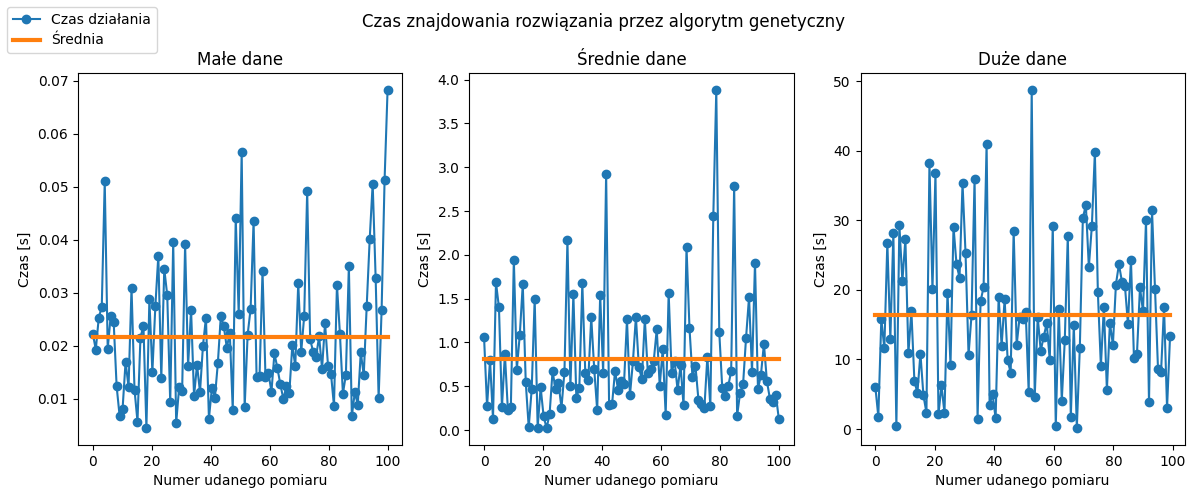

In [11]:
data = [ga_data("small_input"),
        ga_data("medium_input"),
        ga_data("big_input")]

plot_times(data, "algorytm genetyczny")


| Rozmiar danych wejściowych |         Małe          |       Średnie       |        Duże         |
| :------------------------: | :-------------------: | :-----------------: | :-----------------: |
|   Skuteczność algorytmu    |         100%          |        100%         |         99%         |
|    Najszybsze wykonanie    |   0.00447678565979s   | 0.0252683162689209s | 0.1766080856323242s |
|    Najdłuższe wykonanie    |  0.0682284832000732s  | 3.8786752223968506s | 48.67165207862854s  |
|   Średni czas wykonania    | 0.021550991535186723s | 0.8110143566131591s | 16.343913774297693s |


# Inteligencja roju


In [12]:
def optimizer_function(x):
    n_particles = x.shape[0]
    j = [-fitness_func(x[i], _) for i in range(n_particles)]
    return np.array(j)


In [13]:
options = {
    'c1': 0.5,
    'c2': 0.3,
    'w': 0.9,
    'k': 10,
    'p': 1
}


In [14]:
set = small_inputs[randint(1, 5)]

start = time()

optimizer = BinaryPSO(n_particles=10, dimensions=len(set), options=options)

cost, pos = optimizer.optimize(optimizer_function, iters=500, verbose=False)

end = time()

show_result(end - start, cost)


Czas wykonania algorytmu: 0.1441798210144043 sekund
Suma elementów znalezionego podzbioru: 0 => znaleziono poprawne rozwiązanie


In [16]:
set = medium_inputs[randint(1, 5)]

options['k'] = 30

start = time()

optimizer = BinaryPSO(n_particles=30, dimensions=len(set), options=options)

cost, pos = optimizer.optimize(optimizer_function, iters=1250, verbose=False)

end = time()

show_result(end - start, cost)


Czas wykonania algorytmu: 5.020679712295532 sekund
Suma elementów znalezionego podzbioru: 0 => znaleziono poprawne rozwiązanie


In [18]:
set = big_inputs[randint(1, 5)]

options['k'] = 50

start = time()

optimizer = BinaryPSO(n_particles=50, dimensions=len(set), options=options)

cost, pos = optimizer.optimize(optimizer_function, iters=1250, verbose=False)

end = time()

show_result(end - start, cost)


Czas wykonania algorytmu: 49.253475189208984 sekund
Suma elementów znalezionego podzbioru: 3 => nie znaleziono rozwiązania


In [ ]:
pso_times = pd.read_csv("pso_times.csv")


def pso_data(input):
    column = pso_times[pso_times[input] != 0][input]
    result = {"column": column}
    result["avg_time"] = column.mean()
    result["accuraccy"] = len(column) / 100
    result["min_time"] = column.min()
    result["max_time"] = column.max()
    return result


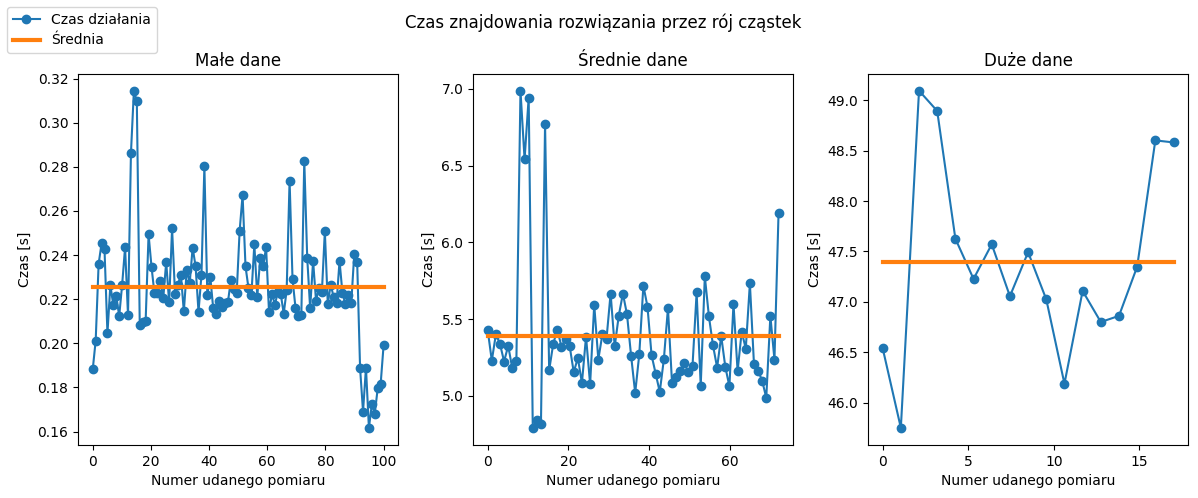

In [ ]:
data = [pso_data("small_input"),
        pso_data("medium_input"),
        pso_data("big_input")]

plot_times(data, "rój cząstek")


| Rozmiar danych wejściowych |         Małe         |      Średnie       |        Duże         |
| :------------------------: | :------------------: | :----------------: | :-----------------: |
|   Skuteczność algorytmu    |         100%         |        72%         |         17%         |
|    Najszybsze wykonanie    | 0.1616637706756591s  | 4.791399717330933s |  45.748215675354s   |
|    Najdłuższe wykonanie    | 0.3144810199737549s  | 6.987470388412476s | 49.09682369232178s  |
|   Średni czas wykonania    | 0.22535311222076415s | 5.390086862776014s | 47.398172673057104s |
